In [73]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import numpy as np
from scipy import stats
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import RobustScaler

In [106]:
df = pd.read_csv('data/immo_df.csv')

In [107]:
df = df.drop('Unnamed: 0', axis=1)

In [6]:
df.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -119.84     36.77                 6.0       1853.0           473.0   
1    -117.80     33.68                 8.0       2032.0           349.0   
2    -120.19     36.60                25.0        875.0           214.0   
3    -118.32     34.10                31.0        622.0           229.0   
4    -121.23     37.79                21.0       1922.0           373.0   

   population  households  median_income  median_house_value ocean_proximity  
0      1397.0       417.0         1.4817             72000.0          INLAND  
1       862.0       340.0         6.9133            274100.0       <1H OCEAN  
2       931.0       214.0         1.5536             58300.0          INLAND  
3       597.0       227.0         1.5284            200000.0       <1H OCEAN  
4      1130.0       372.0         4.0815            117900.0          INLAND

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16512 entries, 0 to 16511
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16336 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
 8   median_house_value  16512 non-null  float64
 9   ocean_proximity     16512 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.3+ MB


In [8]:
df.describe()

longitude      latitude  housing_median_age   total_rooms  \
count  16512.000000  16512.000000        16512.000000  16512.000000   
mean    -119.564046     35.626523           28.624516   2644.170603   
std        2.005033      2.139150           12.597980   2213.946369   
min     -124.350000     32.540000            1.000000      6.000000   
25%     -121.790000     33.930000           18.000000   1446.000000   
50%     -118.490000     34.250000           29.000000   2116.000000   
75%     -118.010000     37.710000           37.000000   3154.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    16336.000000  16512.000000  16512.000000   16512.000000   
mean       539.319540   1435.017260    501.135962       3.864091   
std        425.207704   1158.151967    385.650673       1.893244   
min          2.000000      3.000000      2.000000       0.499900   
25%        296.000000    788.000000    280.000000       2.562500   
50%        435.000000   1168.000000    410.000000       3.531300   
75%        647.000000   1738.000000    606.000000       4.733225   
max       6445.000000  35682.000000   6082.000000      15.000100   

       median_house_value  
count        16512.000000  
mean        206509.251453  
std         115225.957661  
min          14999.000000  
25%         119400.000000  
50%         179300.000000  
75%         264500.000000  
max         500001.000000

In [9]:
df.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        176
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

# premiers visus

In [52]:
fig=px.scatter(df,x='longitude',y='latitude',color='median_house_value')
fig.update_layout(title='Répartitiongeo en fonction des valeurs des biens')
legend=dict(orientation='v')
paper_bgcolor='#FFFFFF'
fig.show(rendered='iframe')

In [53]:
fig=px.scatter(df,x='longitude',y='latitude',color='median_income')
fig.update_layout(title='Répartitiongeo en fonction des revenus')
legend=dict(orientation='v')
paper_bgcolor='#FFFFFF'
fig.show(rendered='iframe')

In [54]:
fig=px.scatter(df,x='longitude',y='latitude',color='population')
fig.update_layout(title='Répartitiongeo en fonction de la population')
legend=dict(orientation='v')
paper_bgcolor='#FFFFFF'
fig.show(rendered='iframe')

In [55]:
fig=px.scatter(df,x='longitude',y='latitude',color='households')
fig.update_layout(title='Répartitiongeo en fonction du nb des menages')
legend=dict(orientation='v')
paper_bgcolor='#FFFFFF'
fig.show(rendered='iframe')

In [56]:
fig=px.scatter(df,x='longitude',y='latitude',color='housing_median_age')
fig.update_layout(title='Répartitiongeo en fonction de age des cartiers')
legend=dict(orientation='v')
paper_bgcolor='#FFFFFF'
fig.show(rendered='iframe')

In [57]:
fig=px.scatter(df,x='longitude',y='latitude',color='total_rooms')
fig.update_layout(title='Répartitiongeo en fonction du nb de piecess')
legend=dict(orientation='v')
paper_bgcolor='#FFFFFF'
fig.show(rendered='iframe')

In [58]:
fig=px.scatter(df,x='longitude',y='latitude',color='total_bedrooms')
fig.update_layout(title='Répartitiongeo en fonction du nb de chambres')
legend=dict(orientation='v')
paper_bgcolor='#FFFFFF'
fig.show(rendered='iframe')

<1H OCEAN     7312
INLAND        5235
NEAR OCEAN    2140
NEAR BAY      1821
ISLAND           4
Name: ocean_proximity, dtype: int64


<AxesSubplot:xlabel='ocean_proximity', ylabel='median_house_value'>

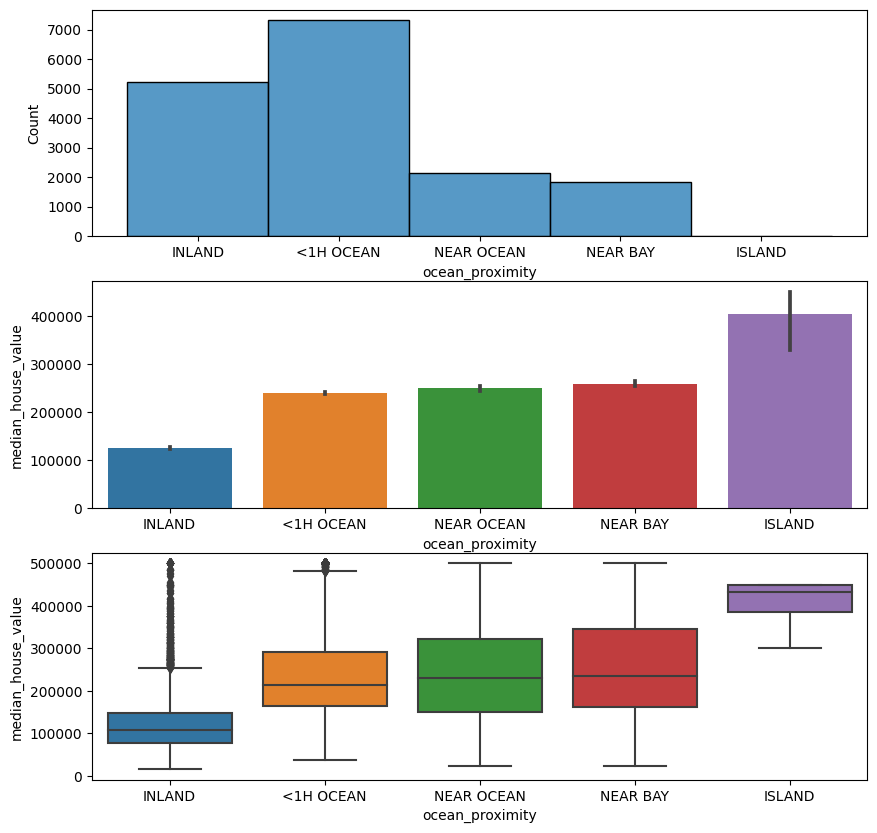

In [63]:
fig,axs = plt.subplots(3,1, figsize=(10,10))
axs=axs.flatten()

print(df['ocean_proximity'].value_counts())
sns.histplot(df,x='ocean_proximity',ax=axs[0])
sns.barplot(x='ocean_proximity',y='median_house_value',data=df, ax=axs[1])
sns.boxplot(data=df, x='ocean_proximity',y='median_house_value', ax=axs[2])

# detection des outliers

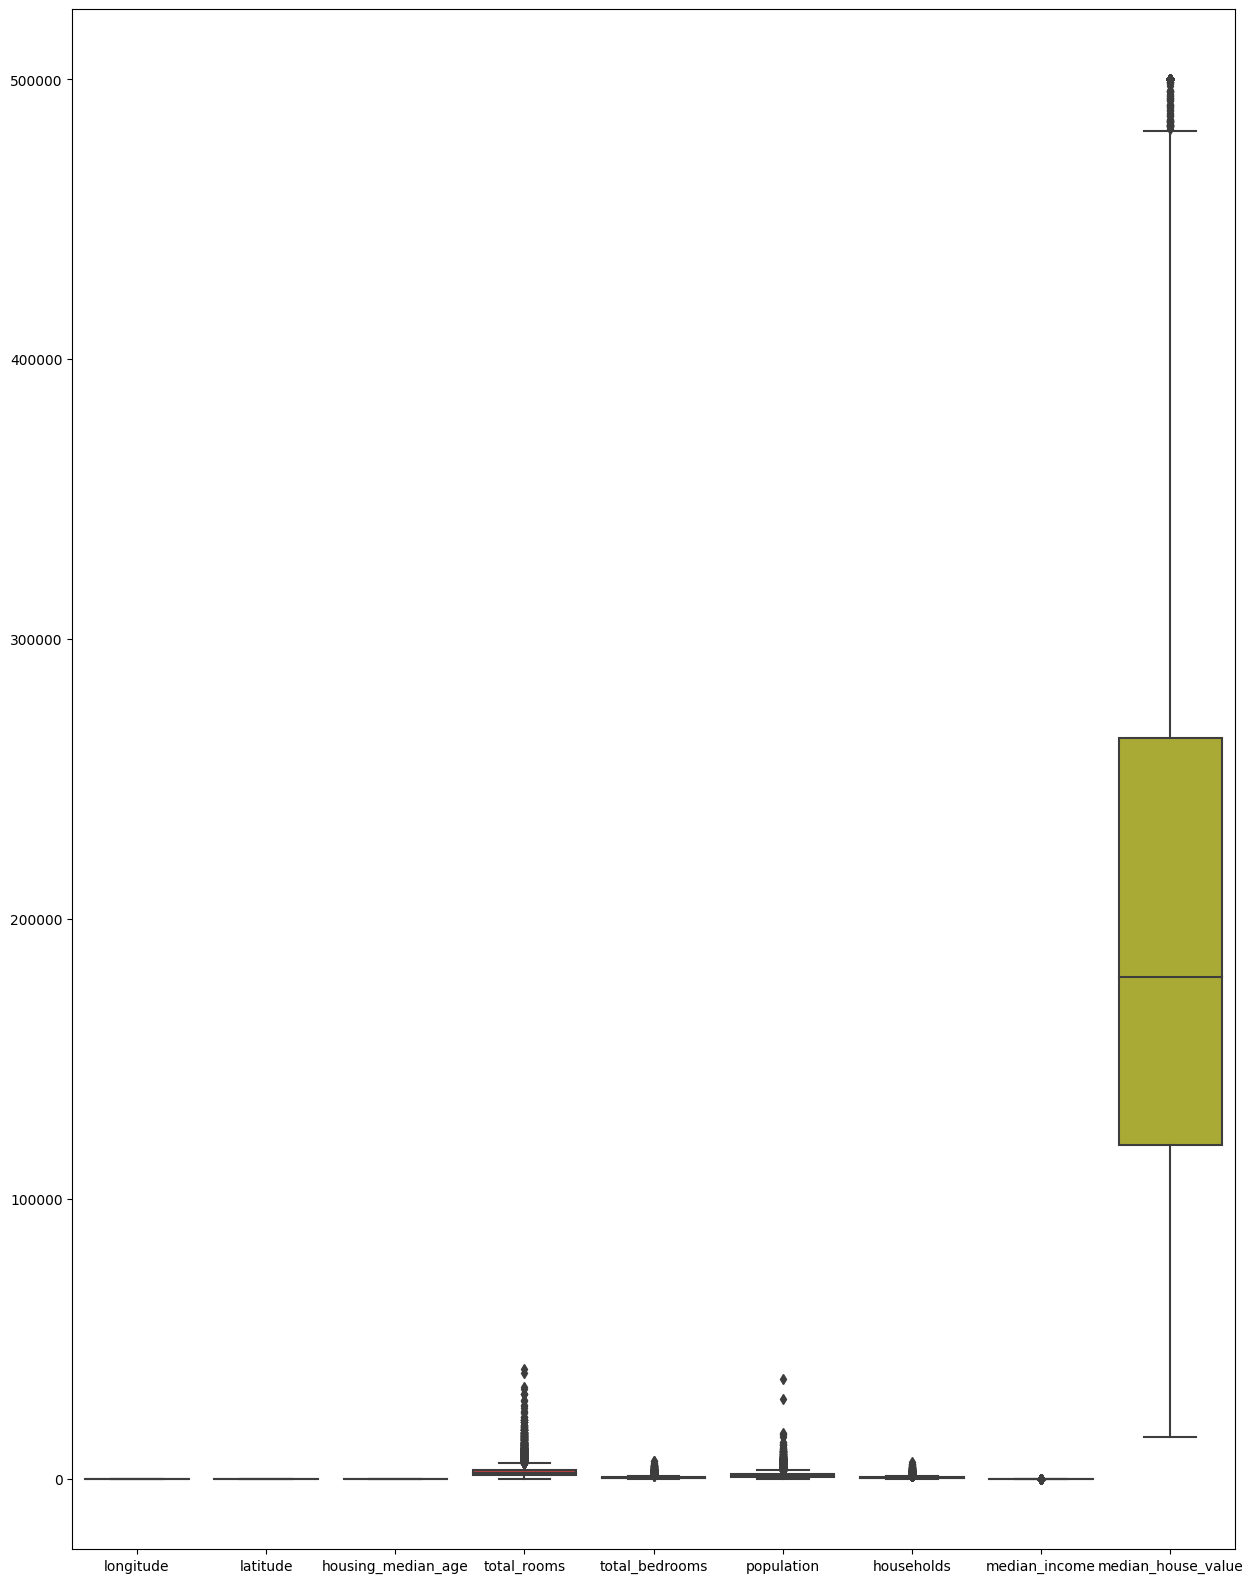

In [51]:
fig,ax = plt.subplots(figsize=(15,20))
sns.boxplot(data = df)
plt.show()

<AxesSubplot:xlabel='median_house_value'>

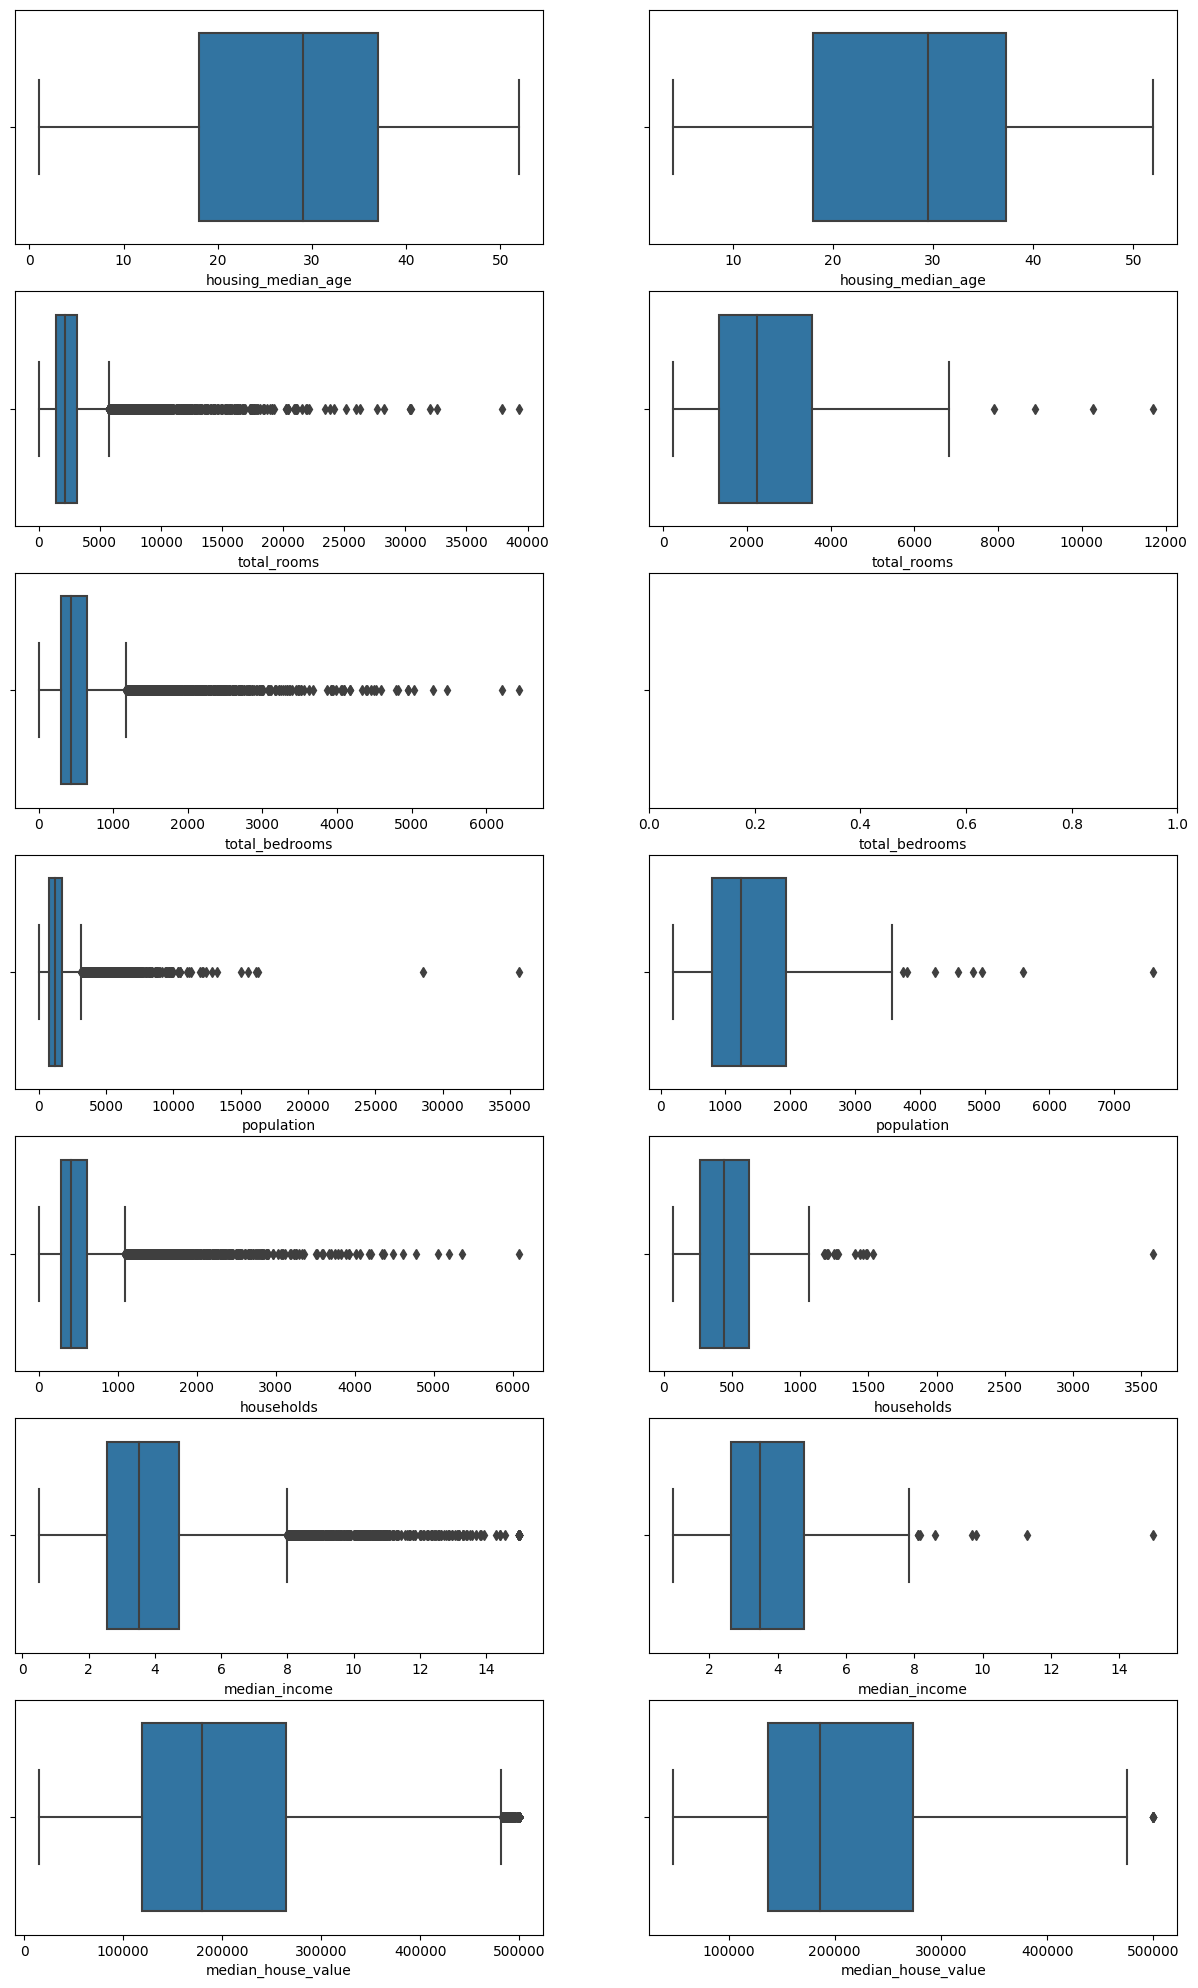

In [64]:
fig, axs = plt.subplots(7, 2, figsize=(15,25))
axs = axs.flatten()

sns.boxplot(x=df.housing_median_age, ax=axs[0])
sns.boxplot(x=df_nan.housing_median_age, ax=axs[1])

sns.boxplot(x=df.total_rooms, ax=axs[2])
sns.boxplot(x=df_nan.total_rooms, ax=axs[3])

sns.boxplot(x=df.total_bedrooms, ax=axs[4])
sns.boxplot(x=df_nan.total_bedrooms, ax=axs[5])

sns.boxplot(x=df.population, ax=axs[6])
sns.boxplot(x=df_nan.population, ax=axs[7])

sns.boxplot(x=df.households, ax=axs[8])
sns.boxplot(x=df_nan.households, ax=axs[9])


sns.boxplot(x=df.median_income, ax=axs[10])
sns.boxplot(x=df_nan.median_income, ax=axs[11])


sns.boxplot(x=df.median_house_value, ax=axs[12])
sns.boxplot(x=df_nan.median_house_value, ax=axs[13])

# Analyse des nans

In [12]:
df_nan = df[df['total_bedrooms'].isna()]

/home/ahmeds/.pyenv/versions/3.8.12/envs/simplon/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/ahmeds/.pyenv/versions/3.8.12/envs/simplon/lib/python3.8/site-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
/home/ahmeds/.pyenv/versions/3.8.12/envs/simplon/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for his

<AxesSubplot:xlabel='median_house_value', ylabel='Density'>

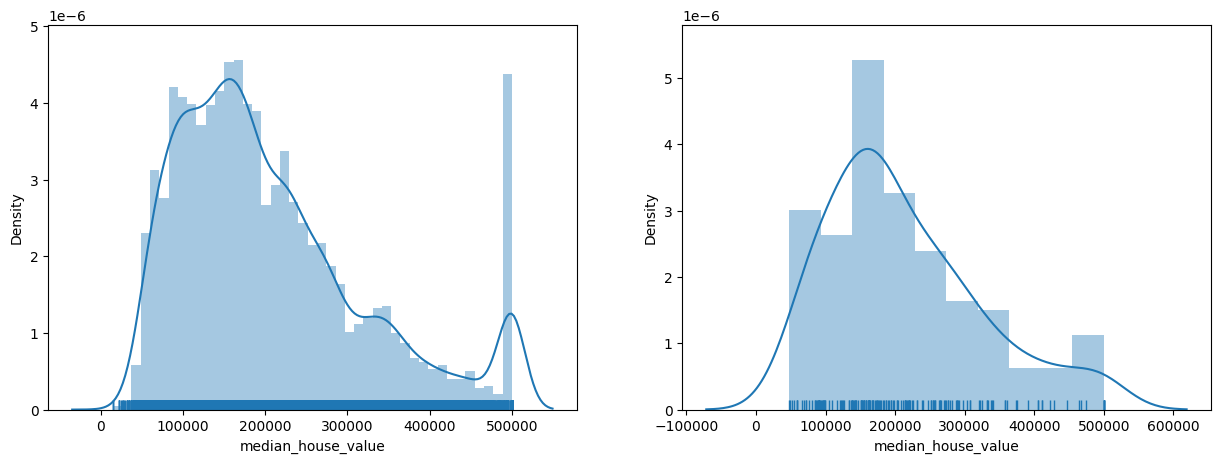

In [21]:
fig, axs = plt.subplots(1, 2, figsize=(15,5))
axs = axs.flatten()

sns.distplot(df['median_house_value'], rug=True, ax=axs[0])
sns.distplot(df_nan['median_house_value'], rug=True, ax=axs[1])


<AxesSubplot:xlabel='ocean_proximity', ylabel='median_house_value'>

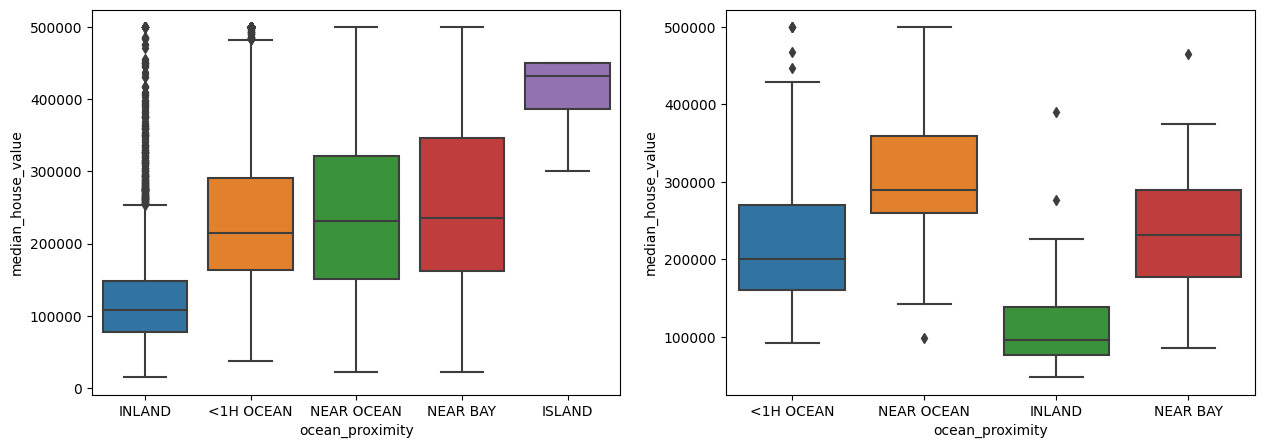

In [27]:
fig, axs = plt.subplots(1, 2, figsize=(15,5))
axs = axs.flatten()

sns.boxplot(x='ocean_proximity',y='median_house_value',data=df, ax=axs[0])
sns.boxplot(x='ocean_proximity',y='median_house_value',data=df_nan, ax=axs[1])

# Premiere conclusion : 
# avec ces graphs on ne voit pas trop de differences entre le df de base et le df fait a partir des valeurs manquantes dans une des colonnes, Cela justifie le fait que je supprime les Nan 

In [108]:
df = df.dropna()

In [109]:
df

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -119.84     36.77                 6.0       1853.0           473.0   
1        -117.80     33.68                 8.0       2032.0           349.0   
2        -120.19     36.60                25.0        875.0           214.0   
3        -118.32     34.10                31.0        622.0           229.0   
4        -121.23     37.79                21.0       1922.0           373.0   
...          ...       ...                 ...          ...             ...   
16507    -121.90     39.59                20.0       1465.0           278.0   
16508    -122.25     38.11                49.0       2365.0           504.0   
16509    -121.22     38.92                19.0       2531.0           461.0   
16510    -118.14     34.16                39.0       2776.0           840.0   
16511    -124.13     40.80                31.0       2152.0           462.0   

       population  households  median_income  median_house_value  \
0          1397.0       417.0         1.4817             72000.0   
1           862.0       340.0         6.9133            274100.0   
2           931.0       214.0         1.5536             58300.0   
3           597.0       227.0         1.5284            200000.0   
4          1130.0       372.0         4.0815            117900.0   
...           ...         ...            ...                 ...   
16507       745.0       250.0         3.0625             93800.0   
16508      1131.0       458.0         2.6133            103100.0   
16509      1206.0       429.0         4.4958            192600.0   
16510      2546.0       773.0         2.5750            153500.0   
16511      1259.0       420.0         2.2478             81100.0   

      ocean_proximity  
0              INLAND  
1           <1H OCEAN  
2              INLAND  
3           <1H OCEAN  
4              INLAND  
...               ...  
16507          INLAND  
16508        NEAR BAY  
16509          INLAND  
16510       <1H OCEAN  
16511      NEAR OCEAN  

[16336 rows x 10 columns]

# regard sur les outliers

In [74]:
df_outliers_target = df[df['median_house_value'] >500000]
df_outliers_target


longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
6        -118.43     34.01                31.0       2526.0           528.0   
10       -118.46     34.07                42.0       2564.0           460.0   
37       -118.39     34.09                41.0        730.0           126.0   
45       -122.10     37.37                37.0       2511.0           354.0   
57       -118.42     33.75                22.0      17591.0          2604.0   
...          ...       ...                 ...          ...             ...   
16334    -122.01     37.26                14.0       2561.0           404.0   
16366    -117.55     33.83                 6.0        502.0            76.0   
16370    -118.42     34.14                27.0       3990.0           892.0   
16414    -118.38     34.07                21.0       3653.0           956.0   
16437    -118.32     34.06                52.0        983.0           246.0   

       population  households  median_income  median_house_value  \
6          1046.0       504.0         4.7009            500001.0   
10          913.0       414.0         9.2225            500001.0   
37          230.0       125.0         4.3214            500001.0   
45          945.0       348.0         8.3924            500001.0   
57         6897.0      2492.0         8.2831            500001.0   
...           ...         ...            ...                 ...   
16334      1172.0       378.0         7.6107            500001.0   
16366       228.0        65.0         4.2386            500001.0   
16370      1417.0       800.0         4.0439            500001.0   
16414      1510.0       890.0         3.5573            500001.0   
16437       578.0       204.0         5.7393            500001.0   

      ocean_proximity  
6           <1H OCEAN  
10          <1H OCEAN  
37          <1H OCEAN  
45           NEAR BAY  
57         NEAR OCEAN  
...               ...  
16334       <1H OCEAN  
16366          INLAND  
16370       <1H OCEAN  
16414       <1H OCEAN  
16437       <1H OCEAN  

[757 rows x 10 columns]

<AxesSubplot:xlabel='ocean_proximity', ylabel='Count'>

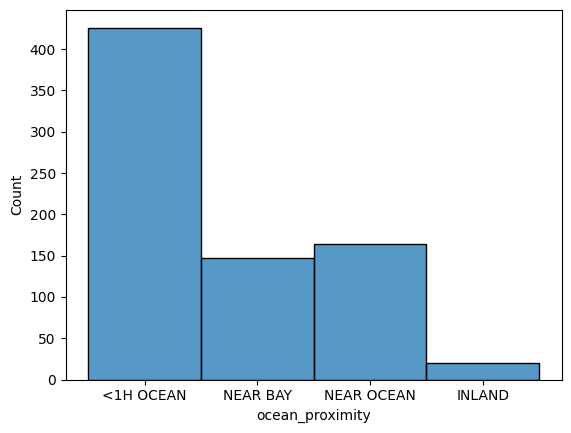

In [73]:
sns.histplot(df_outliers,x='ocean_proximity')

In [91]:
print(df.describe())

          longitude      latitude  housing_median_age   total_rooms  \
count  16336.000000  16336.000000        16336.000000  16336.000000   
mean    -119.564780     35.627727           28.622551   2644.361349   
std        2.005294      2.139979           12.607315   2217.697233   
min     -124.350000     32.540000            1.000000      6.000000   
25%     -121.790000     33.930000           18.000000   1447.000000   
50%     -118.490000     34.250000           29.000000   2115.000000   
75%     -118.010000     37.720000           37.000000   3149.250000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    16336.000000  16336.000000  16336.000000   16336.000000   
mean       539.319540   1434.176787    500.926604       3.863597   
std        425.207704   1158.712057    385.466770       1.892362   
min          2.000000      3.000000      2.000000       0.499900   
25%        296.00000

In [95]:
df_outliers_households = df[df['households'] >1300]
print(df_outliers_households.households.median())
df_outliers_population = df[df['population'] >4500]
print(df_outliers_population.population.median())
df_outliers_bedrooms = df[df['total_bedrooms'] >6000]
print(df_outliers_bedrooms.total_bedrooms.median())
df_outliers_rooms = df[df['total_rooms'] >1300]
print(df_outliers_rooms.total_rooms.median())

1623.0
5692.0
6327.5
2461.0


In [145]:
upper_lim_5 = df['median_income'].quantile(.95)
df_out_income = df[df['median_income']>upper_lim_5]
df_out_income.min()

longitude               -122.64
latitude                  32.63
housing_median_age          2.0
total_rooms                19.0
total_bedrooms              3.0
population                 13.0
households                  4.0
median_income            7.2779
median_house_value      67500.0
ocean_proximity       <1H OCEAN
dtype: object

In [128]:
df_out = df[df['median_house_value']>500000]
df_out

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
6        -118.43     34.01                31.0       2526.0           528.0   
10       -118.46     34.07                42.0       2564.0           460.0   
37       -118.39     34.09                41.0        730.0           126.0   
45       -122.10     37.37                37.0       2511.0           354.0   
57       -118.42     33.75                22.0      17591.0          2604.0   
...          ...       ...                 ...          ...             ...   
16334    -122.01     37.26                14.0       2561.0           404.0   
16366    -117.55     33.83                 6.0        502.0            76.0   
16370    -118.42     34.14                27.0       3990.0           892.0   
16414    -118.38     34.07                21.0       3653.0           956.0   
16437    -118.32     34.06                52.0        983.0           246.0   

       population  households  median_income  median_house_value  \
6          1046.0       504.0         4.7009            500001.0   
10          913.0       414.0         9.2225            500001.0   
37          230.0       125.0         4.3214            500001.0   
45          945.0       348.0         8.3924            500001.0   
57         6897.0      2492.0         8.2831            500001.0   
...           ...         ...            ...                 ...   
16334      1172.0       378.0         7.6107            500001.0   
16366       228.0        65.0         4.2386            500001.0   
16370      1417.0       800.0         4.0439            500001.0   
16414      1510.0       890.0         3.5573            500001.0   
16437       578.0       204.0         5.7393            500001.0   

      ocean_proximity  
6           <1H OCEAN  
10          <1H OCEAN  
37          <1H OCEAN  
45           NEAR BAY  
57         NEAR OCEAN  
...               ...  
16334       <1H OCEAN  
16366          INLAND  
16370       <1H OCEAN  
16414       <1H OCEAN  
16437       <1H OCEAN  

[757 rows x 10 columns]

In [168]:
upper_lim_3 = df['total_rooms'].quantile(.95)
df_out_rooms = df[df['total_rooms']>upper_lim_3]
df_out_rooms.min()

longitude               -123.59
latitude                  32.61
housing_median_age          2.0
total_rooms              4843.0
total_bedrooms            577.0
population                410.0
households                185.0
median_income            1.2065
median_house_value      49500.0
ocean_proximity       <1H OCEAN
dtype: object

In [171]:
upper_lim_2 = df['population'].quantile(.95)
df_out_population = df[df['population']>upper_lim_2]
df_out_population.min()

longitude               -124.15
latitude                  32.55
housing_median_age          2.0
total_rooms                19.0
total_bedrooms              5.0
population               2685.0
households                  6.0
median_income            0.4999
median_house_value      37500.0
ocean_proximity       <1H OCEAN
dtype: object

In [146]:
upper_lim_1 = df['households'].quantile(.95)
df_out_households = df[df['households']>upper_lim_1]
df_out_households.min()

longitude               -123.22
latitude                  32.55
housing_median_age          2.0
total_rooms              2541.0
total_bedrooms           1145.0
population               1690.0
households               1166.0
median_income               0.9
median_house_value      22500.0
ocean_proximity       <1H OCEAN
dtype: object

In [165]:
upper_lim_4 = df['total_bedrooms'].quantile(.95)
df_out_bedrooms = df[df['total_bedrooms']>upper_lim_4]
df_out_bedrooms.min()

longitude               -123.73
latitude                  32.61
housing_median_age          2.0
total_rooms              1714.0
total_bedrooms            985.0
population                337.0
households                130.0
median_income            0.6991
median_house_value      41000.0
ocean_proximity       <1H OCEAN
dtype: object

# Remplacement des outliers par les valeurs medianes des outliers precedents

In [110]:
df.to_csv('df.csv')

In [135]:
df_2 = df.copy()
df_2

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -119.84     36.77                 6.0       1853.0           473.0   
1        -117.80     33.68                 8.0       2032.0           349.0   
2        -120.19     36.60                25.0        875.0           214.0   
3        -118.32     34.10                31.0        622.0           229.0   
4        -121.23     37.79                21.0       1922.0           373.0   
...          ...       ...                 ...          ...             ...   
16507    -121.90     39.59                20.0       1465.0           278.0   
16508    -122.25     38.11                49.0       2365.0           504.0   
16509    -121.22     38.92                19.0       2531.0           461.0   
16510    -118.14     34.16                39.0       2776.0           840.0   
16511    -124.13     40.80                31.0       2152.0           462.0   

       population  households  median_income  median_house_value  \
0          1397.0       417.0         1.4817             72000.0   
1           862.0       340.0         6.9133            274100.0   
2           931.0       214.0         1.5536             58300.0   
3           597.0       227.0         1.5284            200000.0   
4          1130.0       372.0         4.0815            117900.0   
...           ...         ...            ...                 ...   
16507       745.0       250.0         3.0625             93800.0   
16508      1131.0       458.0         2.6133            103100.0   
16509      1206.0       429.0         4.4958            192600.0   
16510      2546.0       773.0         2.5750            153500.0   
16511      1259.0       420.0         2.2478             81100.0   

      ocean_proximity  
0              INLAND  
1           <1H OCEAN  
2              INLAND  
3           <1H OCEAN  
4              INLAND  
...               ...  
16507          INLAND  
16508        NEAR BAY  
16509          INLAND  
16510       <1H OCEAN  
16511      NEAR OCEAN  

[16336 rows x 10 columns]

In [141]:
df_2['households'] = np.where(df['households']>1166, 1496, df_2['households'])
df_2['population'] = np.where(df['population']>3319, 4251, df_2['population'])
df_2['total_rooms'] = np.where(df['total_rooms']>6300, 8240, df_2['total_rooms'])
df_2['total_bedrooms'] = np.where(df['total_bedrooms']>1283, 1623, df_2['total_bedrooms'])

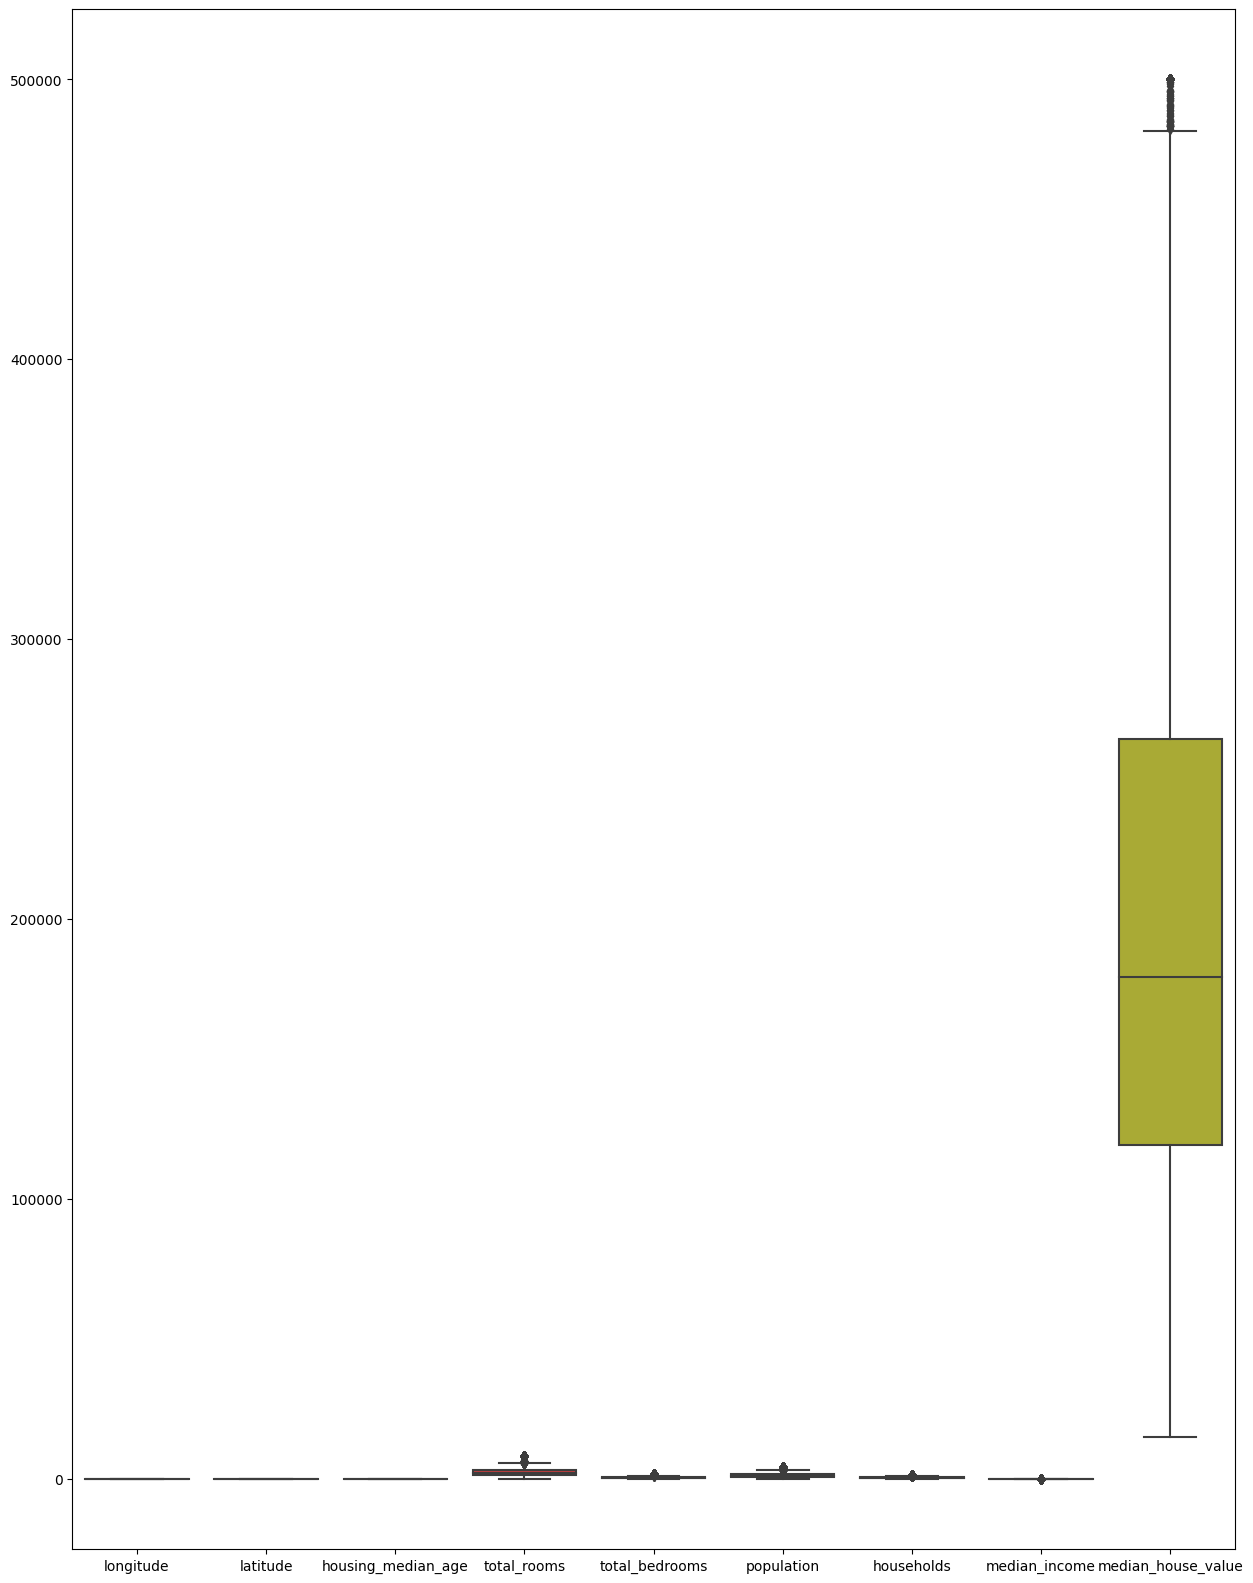

In [143]:
fig,ax = plt.subplots(figsize=(15,20))
sns.boxplot(data = df_2)
plt.show()

In [144]:
df_2.to_csv('df_outliers_median.csv')

# df avec outliers suprimes

In [155]:
df_3 = df.copy()

In [156]:
df_3.drop

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [172]:
df_3 = df[df['households']<= 1166]
df_3 = df_3[df_3['total_bedrooms']<=985]
df_3 = df_3[df_3['total_rooms']<=4843]
df_3 = df_3[df_3['population']<=2695]
df_3 = df_3[df_3['median_income']<=7.2779]

In [174]:
df_sans_outliers = df_3

In [183]:
df_sans_outliers.to_csv('df_sans_outliers.csv')

In [20]:
df = pd.read_csv('Data/df.csv')
df_outliers_median = pd.read_csv('Data/df_outliers_median.csv')
df_sans_outliers = pd.read_csv('Data/df_sans_outliers.csv')

# Normalisation des 3 dataframe

## normalisation df

In [47]:
ohe = OneHotEncoder()
ohe.fit_transform(df[['ocean_proximity']]).toarray()

array([[0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       ...,
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.]])

In [48]:
feature_array = ohe.fit_transform(df[['ocean_proximity']]).toarray()
ohe.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [49]:
feature_labels = ohe.categories_

In [50]:
np.array(feature_labels).ravel()

array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
      dtype=object)

In [51]:
feature_labels = np.array(feature_labels).ravel()

In [52]:
df_enco = pd.DataFrame(feature_array, columns = feature_labels)
df_enco

<1H OCEAN  INLAND  ISLAND  NEAR BAY  NEAR OCEAN
0            0.0     1.0     0.0       0.0         0.0
1            1.0     0.0     0.0       0.0         0.0
2            0.0     1.0     0.0       0.0         0.0
3            1.0     0.0     0.0       0.0         0.0
4            0.0     1.0     0.0       0.0         0.0
...          ...     ...     ...       ...         ...
16331        0.0     1.0     0.0       0.0         0.0
16332        0.0     0.0     0.0       1.0         0.0
16333        0.0     1.0     0.0       0.0         0.0
16334        1.0     0.0     0.0       0.0         0.0
16335        0.0     0.0     0.0       0.0         1.0

[16336 rows x 5 columns]

In [54]:
df_normalized = pd.concat([df_no_ocean,df_enco],axis=1)
df_normalized = df_normalized.drop('Unnamed: 0', axis=1)

In [55]:
df_normalized.to_csv('df_normalized.csv')

## normalisation df_outliers_median

In [23]:
ohe = OneHotEncoder()
ohe.fit_transform(df_outliers_median[['ocean_proximity']]).toarray()

array([[0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       ...,
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.]])

In [24]:
feature_array = ohe.fit_transform(df_outliers_median[['ocean_proximity']]).toarray()
ohe.categories_


[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [25]:
feature_labels = ohe.categories_

In [26]:
np.array(feature_labels).ravel()

array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
      dtype=object)

In [27]:
feature_labels = np.array(feature_labels).ravel()

In [28]:
df_outliers_median_enco = pd.DataFrame(feature_array, columns = feature_labels)
df_outliers_median_enco

<1H OCEAN  INLAND  ISLAND  NEAR BAY  NEAR OCEAN
0            0.0     1.0     0.0       0.0         0.0
1            1.0     0.0     0.0       0.0         0.0
2            0.0     1.0     0.0       0.0         0.0
3            1.0     0.0     0.0       0.0         0.0
4            0.0     1.0     0.0       0.0         0.0
...          ...     ...     ...       ...         ...
16331        0.0     1.0     0.0       0.0         0.0
16332        0.0     0.0     0.0       1.0         0.0
16333        0.0     1.0     0.0       0.0         0.0
16334        1.0     0.0     0.0       0.0         0.0
16335        0.0     0.0     0.0       0.0         1.0

[16336 rows x 5 columns]

In [40]:
df_outliers_median_2 = pd.concat([df_no_ocean,df_outliers_median_enco],axis=1)
df_outliers_median_normalized = df_outliers_median_2.drop('Unnamed: 0', axis=1)

In [41]:
df_outliers_median_normalized.to_csv('df_outliers_median_normalized.csv')

## normalisation sans outliers

In [31]:
ohe = OneHotEncoder()
ohe.fit_transform(df_sans_outliers[['ocean_proximity']]).toarray()

array([[0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       ...,
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.]])

In [32]:
feature_array = ohe.fit_transform(df_sans_outliers[['ocean_proximity']]).toarray()
ohe.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [33]:
feature_labels = ohe.categories_

In [34]:
np.array(feature_labels).ravel()

array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
      dtype=object)

In [35]:
feature_labels = np.array(feature_labels).ravel()

In [36]:
df_sans_outliers_enco = pd.DataFrame(feature_array, columns = feature_labels)
df_sans_outliers_enco

<1H OCEAN  INLAND  ISLAND  NEAR BAY  NEAR OCEAN
0            0.0     1.0     0.0       0.0         0.0
1            1.0     0.0     0.0       0.0         0.0
2            0.0     1.0     0.0       0.0         0.0
3            1.0     0.0     0.0       0.0         0.0
4            0.0     1.0     0.0       0.0         0.0
...          ...     ...     ...       ...         ...
13445        0.0     1.0     0.0       0.0         0.0
13446        0.0     0.0     0.0       1.0         0.0
13447        0.0     1.0     0.0       0.0         0.0
13448        1.0     0.0     0.0       0.0         0.0
13449        0.0     0.0     0.0       0.0         1.0

[13450 rows x 5 columns]

In [37]:
df_no_ocean = df.drop(['ocean_proximity'],axis=1)

In [42]:
df_sans_outliers_2 = pd.concat([df_no_ocean,df_sans_outliers_enco],axis=1)
df_sans_outliers_normalized = df_sans_outliers_2.drop('Unnamed: 0', axis=1)

In [43]:
df_outliers_median_normalized.to_csv('df_sans_outliers_normalized.csv')

# Robust Scaler

## RobustScaler df

In [78]:
df_sans_ocean = df.drop(['ocean_proximity','median_house_value'],axis=1)

In [85]:
rs = RobustScaler()
rs_df = rs.fit_transform(df_sans_ocean)
rs_df = pd.DataFrame(rs_df)
rs_df.columns = df_sans_ocean.columns
rs_df = rs_df.drop(['Unnamed: 0'], axis=1)

In [86]:
rs_df['median_house_value'] = df['median_house_value']

In [110]:
df_Rob = pd.concat([rs_df,df_enco],axis=1)
df_Rob.to_csv('df_RobScaled.csv')

## RobustScaler df_outliers_median

In [90]:
df_m_o = df_outliers_median.copy()

In [96]:
df_m_o_sans_ocean = df_m_o.drop(['ocean_proximity','median_house_value'],axis=1)

In [97]:
rs = RobustScaler()
rs_df_m_o_so = rs.fit_transform(df_m_o_sans_ocean)
rs_df_m_o_so = pd.DataFrame(rs_df_m_o_so)
rs_df_m_o_so.columns = df_m_o_sans_ocean.columns
rs_df_m_o_so = rs_df_m_o_so.drop(['Unnamed: 0'], axis=1)

In [98]:
rs_df_m_o_so['median_house_value'] = df_m_o['median_house_value']

In [108]:
df_m_o_Rob = pd.concat([rs_df_m_o_so,df_outliers_median_enco],axis=1)

In [111]:
df_m_o_Rob.to_csv('df_median_out_RobScaled.csv')

## RobustScaler df_sans_outliers

In [95]:
df_small = df_sans_outliers.copy()

In [100]:
df_small_sans_ocean = df_small.drop(['ocean_proximity','median_house_value'],axis=1)

In [104]:
rs=RobustScaler()
rs_df_small_socean = rs.fit_transform(df_small_sans_ocean)
rs_df_small_socean = pd.DataFrame(rs_df_small_socean)
rs_df_small_socean.columns = df_small_sans_ocean.columns
rs_df_small_socean = rs_df_small_socean.drop(['Unnamed: 0'],axis=1)

In [105]:
rs_df_small_socean['median_house_value'] = df_small['median_house_value']

In [107]:
df_s_o_Rob = pd.concat([rs_df_small_socean,df_sans_outliers_enco],axis=1)

In [112]:
df_s_o_Rob.to_csv('df_s_outliers_RobScaled.csv')